In [ ]:
import os
# !pip install tensorflow
# !pip install scikit-learn
# !pip install opencv-python
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.applications import ResNet50


In [2]:
# Set the path to the root folder containing subfolders for each character
# root_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\MalayalamHandwrittenDataset'
root_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\TestFolder'
num_classes = len(os.listdir(root_folder))
num_classes

43

In [4]:
# Step 1: Read and Load the Data
def load_data(root_folder):
    data = []
    labels = []
    
    for char_folder in os.listdir(root_folder):
        char_path = os.path.join(root_folder, char_folder)
        for img_file in os.listdir(char_path):
            img_path = os.path.join(char_path, img_file)
            # Read the image with alpha channel (transparency)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            # img = cv2.resize(img, (224, 224))
            img = img/255
            img[img<1] = 0
            data.append(img)
            labels.append(char_folder)
    return np.array(data), np.array(labels)

In [6]:
# Step 2: Data Preprocessing
data, labels = load_data(root_folder)

# Label encode classes
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training, validation and testing sets
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Further split the training set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [7]:
# Print the number of images in each class
unique_classes, counts = np.unique(y_train, return_counts=True)

for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} images")

Class 0: 167 images
Class 1: 157 images
Class 2: 163 images
Class 3: 153 images
Class 4: 142 images
Class 5: 128 images
Class 6: 123 images
Class 7: 115 images
Class 8: 127 images
Class 9: 114 images
Class 10: 108 images
Class 11: 113 images
Class 12: 104 images
Class 13: 131 images
Class 14: 118 images
Class 15: 92 images
Class 16: 122 images
Class 17: 119 images
Class 18: 136 images
Class 19: 107 images
Class 20: 108 images
Class 21: 109 images
Class 22: 116 images
Class 23: 127 images
Class 24: 102 images
Class 25: 118 images
Class 26: 128 images
Class 27: 107 images
Class 28: 110 images
Class 29: 100 images
Class 30: 100 images
Class 31: 107 images
Class 32: 92 images
Class 33: 122 images
Class 34: 119 images
Class 35: 108 images
Class 36: 93 images
Class 37: 104 images
Class 38: 87 images
Class 39: 101 images
Class 40: 100 images
Class 41: 99 images
Class 42: 95 images


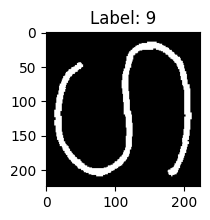

In [8]:
index  = 6
plt.rcParams["figure.figsize"] = (2,2)
plt.imshow(X_train[index])  # Assuming the images are grayscale
plt.title(f'Label: {y_train[index]}')  # Display the corresponding label
plt.show()

In [48]:
# Load the ResNet50 model pre-trained on ImageNet data
model = ResNet50()
# model = ResNet50(weights='imagenet')

In [49]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,      # Randomly rotate images by 0 to 20 degrees
    width_shift_range=0.05,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.05, # Randomly shift images vertically by up to 20% of the height
    shear_range=0.1,        # Shear intensity (shear angle in radians)
    zoom_range=0.1,         # Randomly zoom into images by up to 20%
    horizontal_flip=False,   # Randomly flip images horizontally
    vertical_flip=False,     # Randomly flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels (e.g., 'nearest')
)

# Create a flow from the training data and labels
# This will generate augmented images on-the-fly during training
augmented_data_generator = datagen.flow(X_train, y_train, batch_size=16)

# Step 5: Train the Model
# Now you can use augmented_data_generator as your training data in model.fit
history = model.fit(augmented_data_generator, epochs=10, steps_per_epoch=len(X_train)//16, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
311/311 [==============================] - 895s 3s/step - loss: 0.8341 - accuracy: 0.7984 - val_loss: 15.2613 - val_accuracy: 0.0168
Epoch 2/10
311/311 [==============================] - 1679s 5s/step - loss: 0.1796 - accuracy: 0.9469 - val_loss: 14.0907 - val_accuracy: 0.0266
Epoch 3/10
311/311 [==============================] - 667s 2s/step - loss: 0.1164 - accuracy: 0.9688 - val_loss: 0.2908 - val_accuracy: 0.9034
Epoch 4/10
311/311 [==============================] - 1194s 4s/step - loss: 0.1108 - accuracy: 0.9696 - val_loss: 0.0923 - val_accuracy: 0.9790
Epoch 5/10
311/311 [==============================] - 1984s 6s/step - loss: 0.0637 - accuracy: 0.9855 - val_loss: 0.0734 - val_accuracy: 0.9804
Epoch 6/10
311/311 [==============================] - 2302s 7s/step - loss: 0.0657 - accuracy: 0.9833 - val_loss: 0.1559 - val_accuracy: 0.9594
Epoch 7/10
311/311 [==============================] - 1116s 4s/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.1441 - val_accuracy:

In [51]:
# history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

In [52]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

45/45 [==============================] - 92s 2s/step - loss: 0.2661 - accuracy: 0.9453
Test accuracy: 0.9453398585319519


In [53]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculate accuracy for each character
accuracies = {}
for char_label in set(y_test):
    indices = (y_test == char_label)
    accuracies[char_label] = accuracy_score(y_test[indices], y_pred_classes[indices])

# Print accuracy for each character
for char_label, accuracy in accuracies.items():
    print(f'Character {char_label}: Test Accuracy = {accuracy:.4f}')

# Overall test accuracy
overall_test_loss, overall_test_acc = model.evaluate(X_test, y_test)
print(f'\nOverall Test Accuracy: {overall_test_acc:.4f}')


45/45 [==============================] - 92s 2s/step
Character 0: Test Accuracy = 0.7931
Character 1: Test Accuracy = 0.1509
Character 2: Test Accuracy = 0.9778
Character 3: Test Accuracy = 1.0000
Character 4: Test Accuracy = 0.9767
Character 5: Test Accuracy = 1.0000
Character 6: Test Accuracy = 1.0000
Character 7: Test Accuracy = 1.0000
Character 8: Test Accuracy = 1.0000
Character 9: Test Accuracy = 1.0000
Character 10: Test Accuracy = 0.9722
Character 11: Test Accuracy = 0.9429
Character 12: Test Accuracy = 1.0000
Character 13: Test Accuracy = 0.9722
Character 14: Test Accuracy = 1.0000
Character 15: Test Accuracy = 0.9600
Character 16: Test Accuracy = 1.0000
Character 17: Test Accuracy = 1.0000
Character 18: Test Accuracy = 1.0000
Character 19: Test Accuracy = 0.9706
Character 20: Test Accuracy = 1.0000
Character 21: Test Accuracy = 0.9310
Character 22: Test Accuracy = 1.0000
Character 23: Test Accuracy = 1.0000
Character 24: Test Accuracy = 0.9643
Character 25: Test Accuracy = 1.

In [61]:
num_classes = y_pred.shape[1]  # Get number of classes from y_pred shape
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

top_k_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=4)
top_k_accuracy.update_state(y_test_one_hot, y_pred)
print(f"Top-3 Accuracy: {top_k_accuracy.result().numpy():.4f}")

Top-3 Accuracy: 0.9902


In [55]:
# Training: 97.93, Testing: 95.37, Top 2: 98.18, Top 3: 99.09, Top 4: 99.51, Top 5: 99.65

# Training: 97.51, Testing: 97.96, Top 2: 99.44, Top 3: 99.65, Top 4: 99.65, Top 5: 99.79

# Training: 98.43, Testing: 94.25, Top 2: 97.97, Top 3: 98.46, Top 4: 98.81, Top 5: 99.23

# Training: 97.73, Testing: 94.53, Top 2: 98.25, Top 3: 98.88, Top 4: 99.02, Top 5: 99.03

In [56]:
# Initialize a dictionary to store predicted classes and their counts for each true class
predicted_counts = {char_label: {} for char_label in set(y_test)}

# Count predictions for each true class
for true_label in set(y_test):
    true_indices = (y_test == true_label)
    predicted_labels = y_pred_classes[true_indices]
    
    unique_predicted, counts_predicted = np.unique(predicted_labels, return_counts=True)
    for pred_label, count in zip(unique_predicted, counts_predicted):
        predicted_counts[true_label][pred_label] = count

# Print predicted classes and their counts for each true class
for true_label in sorted(predicted_counts.keys()):
    print(f'True Character {true_label}:')
    for pred_label, count in predicted_counts[true_label].items():
        print(f'    Predicted as Character {pred_label}: {count} times')
    print()

True Character 0:
    Predicted as Character 0: 46 times
    Predicted as Character 14: 4 times
    Predicted as Character 16: 8 times

True Character 1:
    Predicted as Character 1: 8 times
    Predicted as Character 5: 4 times
    Predicted as Character 11: 2 times
    Predicted as Character 16: 39 times

True Character 2:
    Predicted as Character 2: 44 times
    Predicted as Character 14: 1 times

True Character 3:
    Predicted as Character 3: 33 times

True Character 4:
    Predicted as Character 4: 42 times
    Predicted as Character 16: 1 times

True Character 5:
    Predicted as Character 5: 46 times

True Character 6:
    Predicted as Character 6: 43 times

True Character 7:
    Predicted as Character 7: 35 times

True Character 8:
    Predicted as Character 8: 30 times

True Character 9:
    Predicted as Character 9: 33 times

True Character 10:
    Predicted as Character 10: 35 times
    Predicted as Character 28: 1 times

True Character 11:
    Predicted as Character 11:

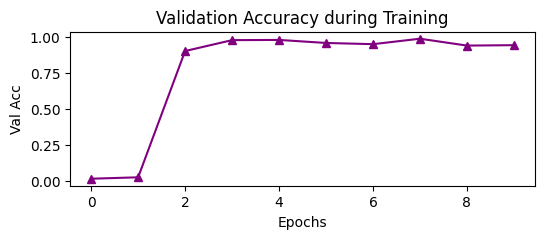

In [57]:
# Access accuracy values from the history object
# train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.rcParams["figure.figsize"] = (6,2)
plt.plot(val_acc,color='purple',marker='^')
# plt.legend(['Val Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Val Acc')
plt.title('Validation Accuracy during Training')
plt.show()

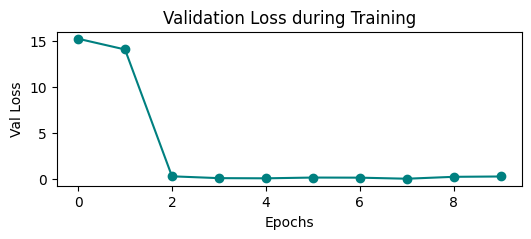

In [58]:
loss_val = history.history['val_loss']
plt.rcParams["figure.figsize"] = (6,2)
plt.plot(loss_val,color='teal',marker='o')
# plt.legend(['Validation Loss Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.title('Validation Loss during Training')
plt.show()